In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
train_df = pd.read_csv("../Google_Stock_Price_Train.csv")
test_df = pd.read_csv("../Google_Stock_Price_Test.csv")

train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
train_df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [4]:
train_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
train_df.shape

(1258, 6)

In [6]:
# x_train = train_df.copy()
# x_train.drop(columns="Open")

train_df = train_df.loc[:, ["Open"]]

print(train_df.shape)

(1258, 1)


## feature scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [8]:
train_df = sc.fit_transform(train_df)

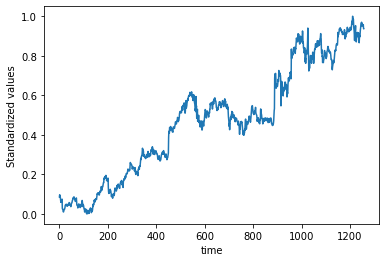

In [9]:
plt.plot(train_df)
plt.ylabel("Standardized values")
plt.xlabel("time")
plt.show()

In [10]:
# Take data of 60 days

xtrain = []
ytrain = []


for i in range(60, 1258):
    xtrain.append(train_df[i-60:i, 0])
    ytrain.append(train_df[i, 0])

In [11]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [12]:
print(xtrain.shape, ytrain.shape)

(1198, 60) (1198,)


In [13]:
xtrain = xtrain.reshape(1198, 60, 1)
xtrain.shape

(1198, 60, 1)

In [14]:
import keras

In [15]:
model = keras.models.Sequential()

In [16]:
from keras.layers import SimpleRNN, Dense

In [17]:
model.add(SimpleRNN(64, activation="tanh", input_shape=(60,1)))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist = model.fit(xtrain, ytrain, epochs=5, validation_split=0.1)

Epoch 1/5
34/34 [==============================] - 1s 13ms/step - loss: 0.0152 - val_loss: 0.0051
Epoch 2/5
34/34 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 3/5
34/34 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/5
34/34 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 5/5
34/34 [==============================] - 0s 8ms/step - loss: 9.1491e-04 - val_loss: 0.0010


In [26]:
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [27]:
test_df.shape

(20, 6)

In [28]:
test_df = test_df.loc[:, ["Open"]]

test_df.shape

(20, 1)

In [31]:
test_df = sc.fit_transform(test_df)

xtest = []

for i in range(test_df.shape[0]):
    xtest.append(test_df[i:i, 0])

xtest = np.array(xtest)


ypred = model.predict(xtest)
ypred = sc.inverse_transform(ypred)
ypred

ValueError: in user code:

    File "D:\anaconda\files\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "D:\anaconda\files\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\anaconda\files\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "D:\anaconda\files\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "D:\anaconda\files\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\anaconda\files\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 60, 1), found shape=(None, 0)
